In [1]:
import numpy as np
import pandas as pd
from scratch import *

Linear Regression
Training loss after  0  iterations is  1.5811388300841898
Training loss after  500  iterations is  0.11515089871796896
Training loss after  1000  iterations is  0.11515089872154656
Training loss after  1500  iterations is  0.11515089872154524
Training loss after  2000  iterations is  0.11515089872154423
Training loss after  2500  iterations is  0.11515089872154423
Training loss after  3000  iterations is  0.11515089872154423
Training loss after  3500  iterations is  0.11515089872154423
Training loss after  4000  iterations is  0.11515089872154423
Training loss after  4500  iterations is  0.11515089872154423
Predicted Values: [[2.76462962]
 [2.76462962]]
True Values: [3]


In [2]:
""" Running Linear Regression on Alabone dataset """

' Running Linear Regression on Alabone dataset '

In [3]:
pp = MyPreProcessor()
X,Y = pp.pre_process(0)
print(X)
print(Y)

[[ 0.05352386  0.50788834  0.42431958 ... -0.02207576  0.24530597
  -0.09951538]
 [ 1.26171644 -0.07501672 -0.18028967 ... -0.71816866 -0.61230092
  -0.11029156]
 [ 1.26171644 -0.15828888 -0.18028967 ... -0.41630313 -0.35228181
  -0.48027378]
 ...
 [-1.15466873  0.71606872  0.67624011 ...  0.43748071  0.43233726
   0.19503356]
 [ 0.05352386 -0.36646926 -0.38182609 ... -0.50415951 -0.27473225
  -0.57007528]
 [-1.15466873  0.84097695  0.67624011 ...  0.63572076  0.50076334
   0.51472693]]
[[ 6.]
 [12.]
 [ 7.]
 ...
 [10.]
 [15.]
 [10.]]


In [4]:
def k_fold_cross_validation(X, y, k=5, loss = "rmse", epochs = 8000, learning_rate = 0.01):
    """ Performs K fold cross validation
    Parameters
    ----------
    model : instance of the model to be used
    X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as data.
    y : 1-dimensional numpy array of shape (n_samples,) which acts as labels.
    k : number of folds, default = 5
    
    Returns
    -------
    model : instance of model
    """
    m = X.shape[0]  #number of examples
    fold_size = int(m/k)
    start = 0
    end = fold_size
    models = {}
    for i in range(k):
        Xtrain_i = np.concatenate((X[0:start], X[end+1:]))
        ytrain_i = np.concatenate((y[0:start],y[end+1:]))
        X_test =  X[start:end]
        y_test = y[start:end]
        model = MyLinearRegression()
        print("For fold : ", i , "/", k)
        model.fit(Xtrain_i,ytrain_i,X_test,y_test,epochs,learning_rate, loss)
        if(loss == "rmse"):
            models[i] = (model.rmse_train_history[-1], model.rmse_val_history[-1], np.array(model.rmse_train_history), np.array(model.rmse_val_history))
        if(loss == "mae"):
            models[i] = (model.mae_train_history[-1], model.mae_val_history[-1], np.array(model.mae_train_history), np.array(model.mae_val_history))
        print(model.W)
        print(model.b)
        start+=fold_size
        end+=fold_size
        
    avg_train = 0
    avg_val  = 0
    for i in range(len(models)):
        avg_train+=models[i][2]
        avg_val+=models[i][3]
            
    
    avg_train = avg_train/k
    avg_val = avg_val/k
    return models, avg_train, avg_val
    

In [5]:
k_models = {}
for i in range(2,11):
    models_rmse,avg_train_loss, avg_val_loss = k_fold_cross_validation(X,Y, k = i, epochs = 5000, learning_rate = 0.01, loss = "rmse")
#     print("The average loss with k = ", i, " is ", " train loss = ", avg_train_loss[-1], "")
    k_models[i] = (avg_train_loss[-1], avg_val_loss[-1])
print(k_models)
    

For fold :  0 / 2
Training loss after  0  iterations is :  10.467738559547147  | validation loss is :  10.414953882174231
Training loss after  500  iterations is :  5.8471513974625315  | validation loss is :  5.8247370226516075
Training loss after  1000  iterations is :  2.897665502508849  | validation loss is :  2.8796515108795666
Training loss after  1500  iterations is :  2.4114514013088986  | validation loss is :  2.3904294967106563
Training loss after  2000  iterations is :  2.346891027831644  | validation loss is :  2.3204868846577713
Training loss after  2500  iterations is :  2.3118577379959087  | validation loss is :  2.2813293528142213
Training loss after  3000  iterations is :  2.28994097321903  | validation loss is :  2.2564675129353584
Training loss after  3500  iterations is :  2.276076006545979  | validation loss is :  2.240437950682088
Training loss after  4000  iterations is :  2.267176026148701  | validation loss is :  2.2299008487654928
Training loss after  4500  ite

[[-0.34142719]
 [ 0.30680965]
 [ 0.83243282]
 [ 0.48289568]
 [ 0.47401573]
 [-2.30146753]
 [-0.34918998]
 [ 2.28069597]]
9.890414108466695
For fold :  2 / 4
Training loss after  0  iterations is :  10.487053051221666  | validation loss is :  10.304418202050934
Training loss after  500  iterations is :  5.869543571900219  | validation loss is :  5.770643470673535
Training loss after  1000  iterations is :  2.9308591157826585  | validation loss is :  2.7822085932926472
Training loss after  1500  iterations is :  2.426081685009485  | validation loss is :  2.2808441418860106
Training loss after  2000  iterations is :  2.354215144975679  | validation loss is :  2.2193023133365473
Training loss after  2500  iterations is :  2.315909443074567  | validation loss is :  2.187947316268998
Training loss after  3000  iterations is :  2.2924158953475016  | validation loss is :  2.1699129799656545
Training loss after  3500  iterations is :  2.2777953994857385  | validation loss is :  2.15956482519206

Training loss after  4000  iterations is :  2.201777236843951  | validation loss is :  2.48191123411859
Training loss after  4500  iterations is :  2.1966422424920315  | validation loss is :  2.475291715851035
[[-0.32031755]
 [ 0.18470025]
 [ 0.59650919]
 [ 1.00749594]
 [ 0.46529802]
 [-2.40835015]
 [-0.33707837]
 [ 2.30728225]]
9.900688143127944
For fold :  0 / 6
Training loss after  0  iterations is :  10.50492978894445  | validation loss is :  10.124512192023712
Training loss after  500  iterations is :  5.884543468934973  | validation loss is :  5.617557216715893
Training loss after  1000  iterations is :  2.9268508450934028  | validation loss is :  2.657035418474632
Training loss after  1500  iterations is :  2.4204037838017274  | validation loss is :  2.2159375797239003
Training loss after  2000  iterations is :  2.3517249382154644  | validation loss is :  2.165877730377751
Training loss after  2500  iterations is :  2.3155535285146804  | validation loss is :  2.1350940073347373


Training loss after  3000  iterations is :  2.2924615036167504  | validation loss is :  2.096908736753503
Training loss after  3500  iterations is :  2.2789454908797286  | validation loss is :  2.0813261065129467
Training loss after  4000  iterations is :  2.2703056170136087  | validation loss is :  2.0712127141808576
Training loss after  4500  iterations is :  2.264631999856739  | validation loss is :  2.0645019581690147
[[-0.34095013]
 [ 0.24275765]
 [ 0.79002244]
 [ 0.52463159]
 [ 0.48449798]
 [-2.40922758]
 [-0.2716634 ]
 [ 2.38606445]]
9.956669214578014
For fold :  1 / 7
Training loss after  0  iterations is :  10.489433739398555  | validation loss is :  10.15228013533456
Training loss after  500  iterations is :  5.88564927794801  | validation loss is :  5.5697870950785004
Training loss after  1000  iterations is :  2.927187243818813  | validation loss is :  2.600217549706887
Training loss after  1500  iterations is :  2.4179265550542155  | validation loss is :  2.17294188158565


Training loss after  2000  iterations is :  2.3555419666438544  | validation loss is :  2.090843587496163
Training loss after  2500  iterations is :  2.3203114623284624  | validation loss is :  2.055189187485759
Training loss after  3000  iterations is :  2.298657519581208  | validation loss is :  2.0317740945534473
Training loss after  3500  iterations is :  2.2850681881399986  | validation loss is :  2.0167870248408635
Training loss after  4000  iterations is :  2.2763617019416027  | validation loss is :  2.007120027569671
Training loss after  4500  iterations is :  2.270627572719627  | validation loss is :  2.000769204885973
[[-0.34025774]
 [ 0.22955324]
 [ 0.79304418]
 [ 0.54413177]
 [ 0.49314426]
 [-2.40690669]
 [-0.29089712]
 [ 2.38902663]]
9.95564143547721
For fold :  1 / 8
Training loss after  0  iterations is :  10.485034242218678  | validation loss is :  10.14143278850831
Training loss after  500  iterations is :  5.875860929145306  | validation loss is :  5.586763011896462
T

Training loss after  1000  iterations is :  2.8430305234782693  | validation loss is :  3.1392929048819425
Training loss after  1500  iterations is :  2.34971768609708  | validation loss is :  2.66762840226546
Training loss after  2000  iterations is :  2.2807366705979417  | validation loss is :  2.6452881628107203
Training loss after  2500  iterations is :  2.2458349747697555  | validation loss is :  2.6473221932269047
Training loss after  3000  iterations is :  2.225667763935977  | validation loss is :  2.6479560781707523
Training loss after  3500  iterations is :  2.2136059831727093  | validation loss is :  2.644539703738982
Training loss after  4000  iterations is :  2.2060882789090344  | validation loss is :  2.6380025221348666
Training loss after  4500  iterations is :  2.201171480891758  | validation loss is :  2.629740127935213
[[-0.32498795]
 [ 0.20181965]
 [ 0.59240095]
 [ 1.06648229]
 [ 0.45709722]
 [-2.41136275]
 [-0.3581011 ]
 [ 2.26477793]]
9.905768806086199
For fold :  0

Training loss after  1000  iterations is :  2.8967617337578457  | validation loss is :  2.882456836008062
Training loss after  1500  iterations is :  2.401063833105391  | validation loss is :  2.3422807356546294
Training loss after  2000  iterations is :  2.3313450150085733  | validation loss is :  2.2708787291334245
Training loss after  2500  iterations is :  2.2943905224830172  | validation loss is :  2.2372124488624134
Training loss after  3000  iterations is :  2.271771808670392  | validation loss is :  2.218096320598236
Training loss after  3500  iterations is :  2.2576483427596075  | validation loss is :  2.207020294405029
Training loss after  4000  iterations is :  2.2486431080016684  | validation loss is :  2.200527155669309
Training loss after  4500  iterations is :  2.2427348638550058  | validation loss is :  2.1966590721330093
[[-0.33224262]
 [ 0.28281444]
 [ 0.79341512]
 [ 0.49940115]
 [ 0.52377293]
 [-2.42236664]
 [-0.32952947]
 [ 2.40571387]]
9.929844828361745
For fold : 

Training loss after  1000  iterations is :  2.8515719087823155  | validation loss is :  3.2091569325949196
Training loss after  1500  iterations is :  2.3701310109371594  | validation loss is :  2.6464799237408103
Training loss after  2000  iterations is :  2.304359133987599  | validation loss is :  2.5517450369230823
Training loss after  2500  iterations is :  2.2690655589454707  | validation loss is :  2.5036145808261354
Training loss after  3000  iterations is :  2.2472508184767275  | validation loss is :  2.4730144623862755
Training loss after  3500  iterations is :  2.233528047529832  | validation loss is :  2.4526088545168934
Training loss after  4000  iterations is :  2.224754774942791  | validation loss is :  2.4386228596088895
Training loss after  4500  iterations is :  2.2190235872771855  | validation loss is :  2.4287563807959978
[[-0.33303679]
 [ 0.25957287]
 [ 0.79031697]
 [ 0.54938413]
 [ 0.46499602]
 [-2.33673194]
 [-0.35705867]
 [ 2.38249216]]
9.911920135911746
For fold

In [6]:
for i in range(2,11):
    print("The average loss with k = ", i, " is ", " train loss = ", k_models[i][0], " validation loss = ", k_models[i][1])


The average loss with k =  2  is   train loss =  2.229849698620617  validation loss =  2.2556926183537986
The average loss with k =  3  is   train loss =  2.2314885848865598  validation loss =  2.2524277996500284
The average loss with k =  4  is   train loss =  2.2309664698155514  validation loss =  2.257347751227494
The average loss with k =  5  is   train loss =  2.2314455100122847  validation loss =  2.255293611505139
The average loss with k =  6  is   train loss =  2.232600791143001  validation loss =  2.256092005783986
The average loss with k =  7  is   train loss =  2.2327921822046193  validation loss =  2.2575755910303568
The average loss with k =  8  is   train loss =  2.232910815564624  validation loss =  2.2566897090788074
The average loss with k =  9  is   train loss =  2.2333792985994214  validation loss =  2.2570576995427825
The average loss with k =  10  is   train loss =  2.2334369389349833  validation loss =  2.255565748030461


In [5]:
models_mae,avg_train_loss, avg_val_loss = k_fold_cross_validation(X,Y, k = 10, epochs = 5000, learning_rate = 0.01, loss = "mae")


For fold :  0 / 10
Training loss after  0  iterations is :  9.973922299095264  | validation loss is :  9.56115107913669
Training loss after  500  iterations is :  4.992397534114976  | validation loss is :  4.628441281937107
Training loss after  1000  iterations is :  1.8479146662305792  | validation loss is :  1.7009201472033393
Training loss after  1500  iterations is :  1.6970923622974468  | validation loss is :  1.5888658381947858
Training loss after  2000  iterations is :  1.649486910808258  | validation loss is :  1.5493801299052479
Training loss after  2500  iterations is :  1.6239091596853774  | validation loss is :  1.5278217559700904
Training loss after  3000  iterations is :  1.607215313767489  | validation loss is :  1.5152855268097898
Training loss after  3500  iterations is :  1.5956880927951018  | validation loss is :  1.505956604476291
Training loss after  4000  iterations is :  1.588098165855292  | validation loss is :  1.500195137805582
Training loss after  4500  itera

Training loss after  4500  iterations is :  1.5762217968392496  | validation loss is :  1.5520675298683624
[[-0.33017278]
 [ 0.27297914]
 [ 0.58418844]
 [ 0.76848373]
 [ 0.23094129]
 [-1.76571289]
 [-0.17223156]
 [ 1.80345188]]
9.454821713677445
For fold :  7 / 10
Training loss after  0  iterations is :  9.934007450771688  | validation loss is :  9.92326139088729
Training loss after  500  iterations is :  4.970610767614121  | validation loss is :  4.96476254128554
Training loss after  1000  iterations is :  1.8461177953403802  | validation loss is :  1.8330276127018232
Training loss after  1500  iterations is :  1.6904545107997704  | validation loss is :  1.6846444104538407
Training loss after  2000  iterations is :  1.6427148233726274  | validation loss is :  1.639891495937965
Training loss after  2500  iterations is :  1.617768420371997  | validation loss is :  1.6127265241093658
Training loss after  3000  iterations is :  1.6017876431013593  | validation loss is :  1.592691555866988

In [6]:
import matplotlib.pyplot as plt

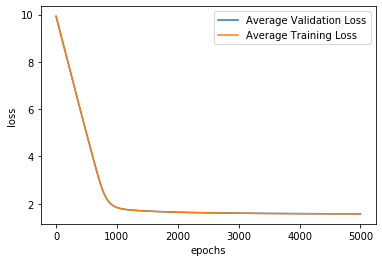

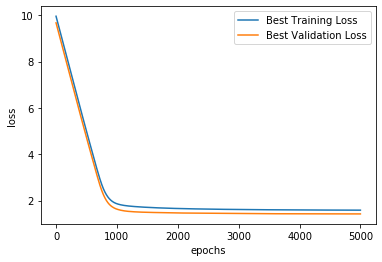

In [7]:
plt.plot([x for x in range(len(avg_val_loss))],avg_val_loss, label = "Average Validation Loss")
plt.plot([x for x in range(len(avg_train_loss))], avg_train_loss, label = "Average Training Loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot([x for x in range(len(models_mae[1][2]))],models_mae[1][2], label = "Best Training Loss")
plt.plot([x for x in range(len(models_mae[1][3]))], models_mae[1][3], label = "Best Validation Loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [8]:
models,avg_train_loss, avg_val_loss = k_fold_cross_validation(X,Y, k = 10, epochs = 5000, learning_rate = 0.01)

For fold :  0 / 10
Training loss after  0  iterations is :  10.486870576920118  | validation loss is :  10.035787282465531
Training loss after  500  iterations is :  5.86907393260698  | validation loss is :  5.558509690298923
Training loss after  1000  iterations is :  2.9117640760436343  | validation loss is :  2.6091901742753114
Training loss after  1500  iterations is :  2.411476545074841  | validation loss is :  2.1811086835804305
Training loss after  2000  iterations is :  2.3443196764251732  | validation loss is :  2.129056984798654
Training loss after  2500  iterations is :  2.308898726845898  | validation loss is :  2.094707801195554
Training loss after  3000  iterations is :  2.287083200981841  | validation loss is :  2.072691222910684
Training loss after  3500  iterations is :  2.273365979989512  | validation loss is :  2.0589457299117515
Training loss after  4000  iterations is :  2.264562722960866  | validation loss is :  2.0503270070950363
Training loss after  4500  iterat

Training loss after  4500  iterations is :  2.2440052292705945  | validation loss is :  2.180815161942584
[[-0.32548126]
 [ 0.26361875]
 [ 0.76149524]
 [ 0.50898293]
 [ 0.51154557]
 [-2.41122095]
 [-0.29531126]
 [ 2.44128554]]
9.938019341330797
For fold :  7 / 10
Training loss after  0  iterations is :  10.440459433754144  | validation loss is :  10.464740386980772
Training loss after  500  iterations is :  5.836422722271372  | validation loss is :  5.870505995342452
Training loss after  1000  iterations is :  2.885682973875023  | validation loss is :  2.9181313138323453
Training loss after  1500  iterations is :  2.3908045500076995  | validation loss is :  2.4259728392004236
Training loss after  2000  iterations is :  2.322423511422818  | validation loss is :  2.3584812531411323
Training loss after  2500  iterations is :  2.286224962603316  | validation loss is :  2.321762499887433
Training loss after  3000  iterations is :  2.2640787637883126  | validation loss is :  2.29869934711394

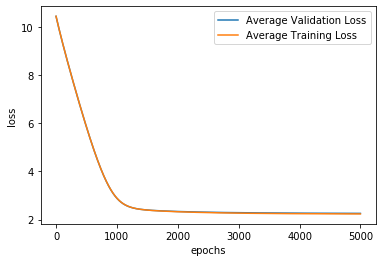

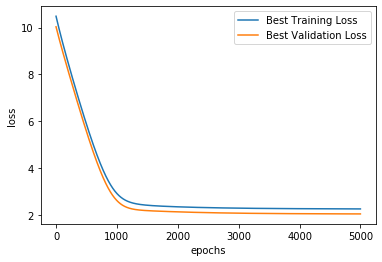

In [9]:
plt.plot([x for x in range(len(avg_val_loss))],avg_val_loss, label = "Average Validation Loss")
plt.plot([x for x in range(len(avg_train_loss))], avg_train_loss, label = "Average Training Loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot([x for x in range(len(models[0][2]))],models[0][2], label = "Best Training Loss")
plt.plot([x for x in range(len(models[0][3]))], models[0][3], label = "Best Validation Loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [10]:
print("Stats for LR MAE Loss")
for i in range(len(models_mae)):
    print("For CV number ",i, "the train loss = ", models_mae[i][0], " and the val loss = ", models_mae[i][1] )
print("Stats for LR RMSE Loss")
for i in range(len(models)):
    print("For CV number ",i, "the train loss = ", models[i][0], " and the val loss = ", models[i][1] )

Stats for LR MAE Loss
For CV number  0 the train loss =  1.5790079453446764  and the val loss =  1.4946051438626606
For CV number  1 the train loss =  1.5862642965124074  and the val loss =  1.4240977434729953
For CV number  2 the train loss =  1.5677558915056704  and the val loss =  1.5922469082822315
For CV number  3 the train loss =  1.5686591348646493  and the val loss =  1.5981470753429103
For CV number  4 the train loss =  1.5591642739969063  and the val loss =  1.705209587161556
For CV number  5 the train loss =  1.5774588854337188  and the val loss =  1.5066208910780743
For CV number  6 the train loss =  1.5724052579682588  and the val loss =  1.5507165483914473
For CV number  7 the train loss =  1.5750455710534508  and the val loss =  1.5486485293038714
For CV number  8 the train loss =  1.5704778436554456  and the val loss =  1.5821056761087104
For CV number  9 the train loss =  1.5533079332565543  and the val loss =  1.7405564842853942
Stats for LR RMSE Loss
For CV number  0

In [11]:
"""LR on Video Game dataset """

'LR on Video Game dataset '

In [12]:
pp = MyPreProcessor()
X,Y = pp.pre_process(1)
print(X)
print(Y)

[[-4.08066146e-01  1.75631681e+00]
 [ 0.00000000e+00  1.33360330e-05]
 [ 0.00000000e+00  1.33360330e-05]
 ...
 [ 0.00000000e+00  1.33360330e-05]
 [ 0.00000000e+00  1.33360330e-05]
 [-9.95233958e-02  1.36051350e+00]]
[[0.07]
 [0.01]
 [0.02]
 ...
 [0.08]
 [1.19]
 [0.29]]


In [15]:
k_models_video_game = {}
for i in range(2,11):
    models_rmse,avg_train_loss, avg_val_loss = k_fold_cross_validation(X,Y, k = i, epochs = 5000, learning_rate = 0.01, loss = "rmse")
#     print("The average loss with k = ", i, " is ", " train loss = ", avg_train_loss[-1], "")
    k_models_video_game[i] = (avg_train_loss[-1], avg_val_loss[-1])
print(k_models_video_game)
    

For fold :  0 / 2
Training loss after  0  iterations is :  1.5499161784774869  | validation loss is :  1.7202719733113556
Training loss after  500  iterations is :  1.4242307554767732  | validation loss is :  1.6031046456102707
Training loss after  1000  iterations is :  1.423667133087237  | validation loss is :  1.6022164803660952
Training loss after  1500  iterations is :  1.4236501996666484  | validation loss is :  1.6021438449675633
Training loss after  2000  iterations is :  1.423649598611362  | validation loss is :  1.6021328581611702
Training loss after  2500  iterations is :  1.4236495771826103  | validation loss is :  1.6021308789164812
Training loss after  3000  iterations is :  1.423649576418553  | validation loss is :  1.6021305085528823
Training loss after  3500  iterations is :  1.42364957639131  | validation loss is :  1.6021304387375777
Training loss after  4000  iterations is :  1.4236495763903385  | validation loss is :  1.6021304255587725
Training loss after  4500  i

Training loss after  1500  iterations is :  1.5544560775633491  | validation loss is :  1.3920620894665998
Training loss after  2000  iterations is :  1.554455463314047  | validation loss is :  1.3920640196076217
Training loss after  2500  iterations is :  1.5544554411458462  | validation loss is :  1.392064450772795
Training loss after  3000  iterations is :  1.5544554403453228  | validation loss is :  1.3920645349328866
Training loss after  3500  iterations is :  1.5544554403164141  | validation loss is :  1.392064551002305
Training loss after  4000  iterations is :  1.55445544031537  | validation loss is :  1.3920645540586072
Training loss after  4500  iterations is :  1.5544554403153326  | validation loss is :  1.3920645546394907
[[ 0.34154077]
 [-0.05883244]]
0.5355486129105738
For fold :  3 / 4
Training loss after  0  iterations is :  1.6560975814541212  | validation loss is :  1.5796022032029848
Training loss after  500  iterations is :  1.5358718048207078  | validation loss is 

Training loss after  3000  iterations is :  1.563119285567066  | validation loss is :  1.2504549733091388
Training loss after  3500  iterations is :  1.5631192855062441  | validation loss is :  1.2504548896084922
Training loss after  4000  iterations is :  1.563119285503752  | validation loss is :  1.2504548726724416
Training loss after  4500  iterations is :  1.5631192855036495  | validation loss is :  1.250454869244425
[[ 0.33957056]
 [-0.05626023]]
0.5365457233477875
For fold :  1 / 6
Training loss after  0  iterations is :  1.4692038044878073  | validation loss is :  2.3004788118604997
Training loss after  500  iterations is :  1.340147496906679  | validation loss is :  2.194127704203531
Training loss after  1000  iterations is :  1.3397241468122942  | validation loss is :  2.1928907821303114
Training loss after  1500  iterations is :  1.3397148014284812  | validation loss is :  2.1927984283275395
Training loss after  2000  iterations is :  1.3397145615482706  | validation loss is 

Training loss after  4500  iterations is :  1.3887742498472035  | validation loss is :  2.1227719817889517
[[ 0.33124856]
 [-0.06056381]]
0.5265516669936208
For fold :  2 / 7
Training loss after  0  iterations is :  1.6386197321701461  | validation loss is :  1.6294182815803955
Training loss after  500  iterations is :  1.517089898520794  | validation loss is :  1.5105333199286222
Training loss after  1000  iterations is :  1.5164482403462922  | validation loss is :  1.5099105151367969
Training loss after  1500  iterations is :  1.5164289515773386  | validation loss is :  1.50990557655867
Training loss after  2000  iterations is :  1.5164282311257826  | validation loss is :  1.5099080367495767
Training loss after  2500  iterations is :  1.5164282039824182  | validation loss is :  1.5099086414996532
Training loss after  3000  iterations is :  1.516428202959463  | validation loss is :  1.5099087636820772
Training loss after  3500  iterations is :  1.5164282029209102  | validation loss is

Training loss after  500  iterations is :  1.4818234647996384  | validation loss is :  1.738817207151164
Training loss after  1000  iterations is :  1.4812483243366321  | validation loss is :  1.737055572002543
Training loss after  1500  iterations is :  1.4812320421663747  | validation loss is :  1.7369231731017016
Training loss after  2000  iterations is :  1.481231474478431  | validation loss is :  1.7369042391613936
Training loss after  2500  iterations is :  1.481231454535298  | validation loss is :  1.7369008892466036
Training loss after  3000  iterations is :  1.4812314538345137  | validation loss is :  1.7369002681209966
Training loss after  3500  iterations is :  1.4812314538098885  | validation loss is :  1.7369001519225131
Training loss after  4000  iterations is :  1.4812314538090234  | validation loss is :  1.7369001301485785
Training loss after  4500  iterations is :  1.481231453808993  | validation loss is :  1.73690012606722
[[ 0.33301292]
 [-0.0588503 ]]
0.525283762866

Training loss after  2000  iterations is :  1.4010540913019498  | validation loss is :  2.228927144922556
Training loss after  2500  iterations is :  1.401054080792337  | validation loss is :  2.2289272602491845
Training loss after  3000  iterations is :  1.4010540804844474  | validation loss is :  2.2289272818189265
Training loss after  3500  iterations is :  1.4010540804754272  | validation loss is :  2.2289272855633158
Training loss after  4000  iterations is :  1.401054080475163  | validation loss is :  2.2289272862057152
Training loss after  4500  iterations is :  1.4010540804751555  | validation loss is :  2.228927286315713
[[ 0.34056015]
 [-0.05879015]]
0.5294047341055725
For fold :  2 / 9
Training loss after  0  iterations is :  1.6156519726359981  | validation loss is :  1.8011538514390104
Training loss after  500  iterations is :  1.4962502610061506  | validation loss is :  1.6684877584051718
Training loss after  1000  iterations is :  1.4956646264489861  | validation loss is

Training loss after  3500  iterations is :  1.5410745844740315  | validation loss is :  1.2928506756607256
Training loss after  4000  iterations is :  1.5410745844726699  | validation loss is :  1.2928507095277877
Training loss after  4500  iterations is :  1.5410745844726188  | validation loss is :  1.2928507160783769
[[ 0.34547272]
 [-0.05930132]]
0.5367297071365704
For fold :  0 / 10
Training loss after  0  iterations is :  1.6470572589143202  | validation loss is :  1.5467800379939498
Training loss after  500  iterations is :  1.5285713702657713  | validation loss is :  1.4007510260274405
Training loss after  1000  iterations is :  1.5279456614097926  | validation loss is :  1.3989255317389624
Training loss after  1500  iterations is :  1.5279273229559778  | validation loss is :  1.3987383152489201
Training loss after  2000  iterations is :  1.5279266439480843  | validation loss is :  1.398706858039867
Training loss after  2500  iterations is :  1.5279266185545781  | validation los

[[ 0.3483224 ]
 [-0.05951399]]
0.5405220379862234
For fold :  7 / 10
Training loss after  0  iterations is :  1.5879701485009319  | validation loss is :  2.0282265780885114
Training loss after  500  iterations is :  1.4650830717398053  | validation loss is :  1.9157288064182283
Training loss after  1000  iterations is :  1.4645294869031877  | validation loss is :  1.9145677790591034
Training loss after  1500  iterations is :  1.4645149966018551  | validation loss is :  1.9144929118123488
Training loss after  2000  iterations is :  1.4645145295792297  | validation loss is :  1.914483224531159
Training loss after  2500  iterations is :  1.46451451441252  | validation loss is :  1.9144816013243442
Training loss after  3000  iterations is :  1.464514513919854  | validation loss is :  1.9144813127573554
Training loss after  3500  iterations is :  1.4645145139038505  | validation loss is :  1.914481260877888
Training loss after  4000  iterations is :  1.4645145139033307  | validation loss is

In [16]:
for i in range(2,11):
    print("The average loss with k = ", i, " is ", " train loss = ", k_models_video_game[i][0], " validation loss = ", k_models_video_game[i][1])


The average loss with k =  2  is   train loss =  1.5128465554619095  validation loss =  1.5129411073792254
The average loss with k =  3  is   train loss =  1.5104759993792245  validation loss =  1.4951161066004357
The average loss with k =  4  is   train loss =  1.5142599191765818  validation loss =  1.5063851029349744
The average loss with k =  5  is   train loss =  1.51287203041841  validation loss =  1.4839413774937251
The average loss with k =  6  is   train loss =  1.5130574456788002  validation loss =  1.4699168337071662
The average loss with k =  7  is   train loss =  1.5140970070754494  validation loss =  1.4742793679498507
The average loss with k =  8  is   train loss =  1.5144919267438042  validation loss =  1.474297176929585
The average loss with k =  9  is   train loss =  1.5147533157694322  validation loss =  1.4794465646425081
The average loss with k =  10  is   train loss =  1.5144726027047515  validation loss =  1.4559566789845473


In [13]:
video_game_model_rmse,avg_train_loss, avg_val_loss = k_fold_cross_validation(X,Y,k=10, epochs = 3500, learning_rate = 0.005)

For fold :  0 / 10
Training loss after  0  iterations is :  1.6470572589143202  | validation loss is :  1.5467800379939498
Training loss after  500  iterations is :  1.5344107383686658  | validation loss is :  1.4102451445596718
Training loss after  1000  iterations is :  1.528574156034646  | validation loss is :  1.4007574648375705
Training loss after  1500  iterations is :  1.5280297801408154  | validation loss is :  1.3993144903871912
Training loss after  2000  iterations is :  1.5279457651984567  | validation loss is :  1.3989262782484062
Training loss after  2500  iterations is :  1.5279302947889168  | validation loss is :  1.3987914213921482
Training loss after  3000  iterations is :  1.5279273286058863  | validation loss is :  1.3987384779396728
[[ 0.33433124]
 [-0.05625463]]
0.5316522604804466
For fold :  1 / 10
Training loss after  0  iterations is :  1.6695344554893319  | validation loss is :  1.3117960424440507
Training loss after  500  iterations is :  1.5552400221977012  |

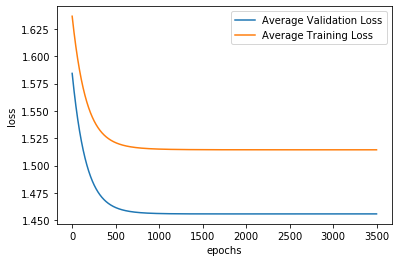

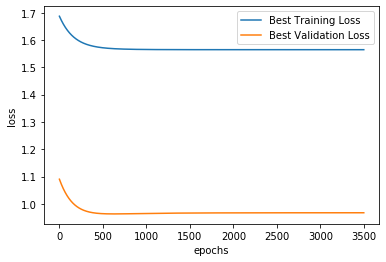

In [14]:
plt.plot([x for x in range(len(avg_val_loss))],avg_val_loss, label = "Average Validation Loss")
plt.plot([x for x in range(len(avg_train_loss))], avg_train_loss, label = "Average Training Loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


plt.plot([x for x in range(len(video_game_model_rmse[6][2]))],video_game_model_rmse[6][2], label = "Best Training Loss")
plt.plot([x for x in range(len(video_game_model_rmse[6][3]))], video_game_model_rmse[6][3], label = "Best Validation Loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [15]:
video_game_model_mae,avg_train_loss, avg_val_loss = k_fold_cross_validation(X,Y,k=10, epochs = 3500,learning_rate = 0.005,loss = "mae")

For fold :  0 / 10
Training loss after  0  iterations is :  0.5308240845351233  | validation loss is :  0.5582345900658288
Training loss after  500  iterations is :  0.45700100148196915  | validation loss is :  0.4795379001896245
Training loss after  1000  iterations is :  0.4569978303085981  | validation loss is :  0.47944268317976707
Training loss after  1500  iterations is :  0.45699777289358195  | validation loss is :  0.47943061217561195
Training loss after  2000  iterations is :  0.45699777279284237  | validation loss is :  0.47943060070940163
Training loss after  2500  iterations is :  0.4569977728276957  | validation loss is :  0.4794305500677892
Training loss after  3000  iterations is :  0.4569977728672719  | validation loss is :  0.47943060865270953
[[ 0.05115998]
 [-0.00779574]]
0.1862477570279814
For fold :  1 / 10
Training loss after  0  iterations is :  0.5368040140891872  | validation loss is :  0.5039736684619988
Training loss after  500  iterations is :  0.46190991979

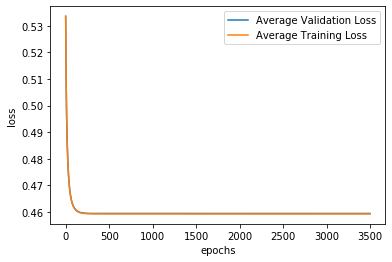

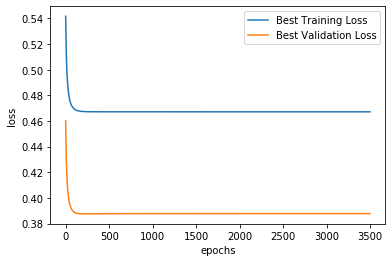

In [16]:
plt.plot([x for x in range(len(avg_val_loss))],avg_val_loss, label = "Average Validation Loss")
plt.plot([x for x in range(len(avg_train_loss))], avg_train_loss, label = "Average Training Loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


plt.plot([x for x in range(len(video_game_model_mae[6][2]))],video_game_model_mae[6][2], label = "Best Training Loss")
plt.plot([x for x in range(len(video_game_model_mae[6][3]))], video_game_model_mae[6][3], label = "Best Validation Loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [17]:
print("Stats for LR MAE Loss")
for i in range(len(video_game_model_mae)):
    print("For CV number ",i, "the train loss = ", video_game_model_mae[i][0], " and the val loss = ", video_game_model_mae[i][1] )
print("Stats for LR RMSE Loss")
for i in range(len(video_game_model_rmse)):
    print("For CV number ",i, "the train loss = ", video_game_model_rmse[i][0], " and the val loss = ", video_game_model_rmse[i][1] )

Stats for LR MAE Loss
For CV number  0 the train loss =  0.45699777280210174  and the val loss =  0.47943058759985263
For CV number  1 the train loss =  0.46190686364648736  and the val loss =  0.4348008539326736
For CV number  2 the train loss =  0.4507377454538373  and the val loss =  0.5357182538972228
For CV number  3 the train loss =  0.4594885958767579  and the val loss =  0.45695310333692807
For CV number  4 the train loss =  0.46594191784987354  and the val loss =  0.39880624409400794
For CV number  5 the train loss =  0.45667520159297104  and the val loss =  0.48224799944922686
For CV number  6 the train loss =  0.4671727997697697  and the val loss =  0.3877950464553649
For CV number  7 the train loss =  0.4538603841330389  and the val loss =  0.5075830230387078
For CV number  8 the train loss =  0.45770713510567584  and the val loss =  0.4727399062916709
For CV number  9 the train loss =  0.4615709789592122  and the val loss =  0.43761736361008263
Stats for LR RMSE Loss
For C

In [18]:
df = pd.read_csv("LR_dataset/VideoGameDataset - Video_Games_Sales_as_at_22_Dec_2016.csv",  usecols=['Critic_Score','User_Score','Global_Sales'])
df.head()

,Global_Sales,Critic_Score,User_Score
0,82.53,76.0,8
1,40.24,NaN,NaN
2,35.52,82.0,8.3
3,32.77,80.0,8
4,31.37,NaN,NaN


In [19]:
df.isna().sum()

Global_Sales       0
Critic_Score    8582
User_Score      6704
dtype: int64

In [20]:
df["Critic_Score"].value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
17.0      1
22.0      1
13.0      1
21.0      1
Name: Critic_Score, Length: 82, dtype: int64

In [21]:
df["User_Score"].value_counts()

tbd    2425
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.5       2
1         2
0.6       2
9.7       1
0         1
Name: User_Score, Length: 96, dtype: int64

In [22]:
def get_analytical_sol(X,y):
#     bias = np.zeros((X.shape[0],1))
#     bias.fill(1)
#     X = np.append(X,bias, axis = 1)
#     print(X)
    W = np.dot(np.linalg.inv(np.dot(X.T,X)), np.dot(X.T,y))
    return W


In [23]:
preproc = MyPreProcessor()
X,y = preproc.pre_process(0)

In [24]:
m = X.shape[0]  #number of examples
fold_size = int(m/10)
start = fold_size
end = 2*fold_size

In [25]:
Xtrain_i = np.concatenate((X[0:start], X[end+1:]))
ytrain_i = np.concatenate((y[0:start],y[end+1:]))
X_test =  X[start:end]
y_test = y[start:end]

bias = np.zeros((Xtrain_i.shape[0],1))
bias.fill(1)
Xtrain_i = np.append(Xtrain_i,bias, axis = 1)

bias = np.zeros((X_test.shape[0],1))
bias.fill(1)
X_test = np.append(X_test,bias, axis = 1)



In [26]:
print(X_test)
print(Xtrain_i)
print(Xtrain_i.shape)
print(X_test.shape)
print(ytrain_i.shape)
print(y_test.shape)
print(ytrain_i)
print(y_test)

[[-1.15466873 -1.11591862 -1.08720356 ... -1.05935132 -1.10529227
   1.        ]
 [-1.15466873  1.04915733  1.02892884 ...  0.82008506  1.51691176
   1.        ]
 [-1.15466873 -0.61628571 -0.63374662 ... -0.62142439 -0.74608624
   1.        ]
 ...
 [ 1.26171644 -1.36573508 -1.33912408 ... -1.2691913  -1.21305408
   1.        ]
 [-1.15466873 -0.90773824 -1.08720356 ... -1.02285741 -1.03345107
   1.        ]
 [-1.15466873  1.34060986  1.02892884 ...  1.18502416  0.96014241
   1.        ]]
[[ 0.05352386  0.50788834  0.42431958 ...  0.24530597 -0.09951538
   1.        ]
 [ 1.26171644 -0.07501672 -0.18028967 ... -0.61230092 -0.11029156
   1.        ]
 [ 1.26171644 -0.15828888 -0.18028967 ... -0.35228181 -0.48027378
   1.        ]
 ...
 [-1.15466873  0.71606872  0.67624011 ...  0.43233726  0.19503356
   1.        ]
 [ 0.05352386 -0.36646926 -0.38182609 ... -0.27473225 -0.57007528
   1.        ]
 [-1.15466873  0.84097695  0.67624011 ...  0.50076334  0.51472693
   1.        ]]
(3758, 9)
(417, 

In [27]:
W = get_analytical_sol(Xtrain_i,ytrain_i)
print(W)

[[-3.16573902e-01]
 [-9.35381651e-03]
 [ 1.10142143e+00]
 [ 4.35909882e-01]
 [ 4.66595525e+00]
 [-4.63952803e+00]
 [-1.09014505e+00]
 [ 1.19578816e+00]
 [ 9.95246476e+00]]


In [28]:
y_pred_train = np.dot(Xtrain_i,W)
error = (np.sum(abs(ytrain_i-y_pred_train))/y_pred_train.shape[0])
print(error)

1.5972868051385163


In [29]:
y_pred_test = np.dot(X_test,W)
error = (np.sum(abs(y_test-y_pred_test))/y_pred_test.shape[0])
print(error)


1.4951636472577468


In [34]:
Xtrain_i = Xtrain_i[:,:-1]
X_test = X_test[:,:-1]